In [1]:
# Import libraries and dependencies
from copy import deepcopy
from typing import Tuple, List, Dict

from cluster.cluster import CustomCluster
from configurations.default_values import (
    DefaultQueries,
    DefaultShodanValues,
    DefaultValues,
)
from handlers.files_handler import FilesHandler
from handlers.shodan_handler import ShodanHandler
from helpers.tools import Tools
from parsers.http_parser import HttpParser

In [2]:
# Create cluster
raw_results = FilesHandler().open_results(filename=DefaultValues.DATA_FILE)
http_parser = HttpParser(
    process_cookie=True,
    process_trash_headers=True,
    remove_digits=True,
    remove_special=True,
)
prepared_results = Tools.process_data(deepcopy(raw_results), http_parser)

cluster = CustomCluster(prepared_results)
cluster.prepare_matrix()

Calculate results for 1 clusters
Calculate results for 2 clusters
Calculate results for 3 clusters
Calculate results for 4 clusters
Calculate results for 5 clusters
Calculate results for 6 clusters
Calculate results for 7 clusters
Calculate results for 8 clusters
Calculate results for 9 clusters


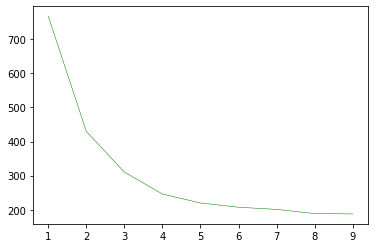

In [3]:
# Determine quantity of cluster with the Elbow method
cluster.determine_k(k_range=(1, 10))

In [ ]:
# Use also the Silhouette score method
_clusters_q = cluster.calculate_silhouette_score(k_range=(2, 10))
cluster.make_cluster(clusters_q=_clusters_q)

Current cluster: 2, silhouette score: 0.7153906264146654
Current cluster: 3, silhouette score: 0.805620829044585
Current cluster: 4, silhouette score: 0.8384322879980213
Current cluster: 5, silhouette score: 0.8232291272554404
Current cluster: 6, silhouette score: 0.826513941158198
Current cluster: 7, silhouette score: 0.8211850082266298


In [ ]:
# Print example samples from clusters
print(" ---\nExamples from clusters directly\n --- ")
direct_examples = {}
for class_name, class_hosts in raw_results.items():
    for host_data in class_hosts:
        processed_host = http_parser.process_headers(host_data)
        cluster_index = cluster.predict(processed_host)[0]
        if cluster_index not in direct_examples.keys():
            direct_examples[cluster_index] = []
        else:
            direct_examples[cluster_index].append(
                {"class_name": class_name, "data": host_data}
            )
direct_examples = {
    key: direct_examples[key] for key in sorted(direct_examples.keys())
}
for index, hosts in direct_examples.items():
    print(f"Cluster [{index}]:")
    for host in hosts[:5]:
        print(
            host.get("class_name"), f"[{index}]", "\t - \t", repr(host.get("data"))
        )